Importing Needed Libraries

In [1]:
#Step 1: Import Libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Loading ResNet50 extracted embeddings (2048 features) from MRI brain tumor images(4 classes)

In [2]:
#Step 2: Load ResNet50 Features
X = np.load("X_brain_features.npy")
y = np.load("y_brain_labels.npy")
class_names = np.load("class_names.npy", allow_pickle=True)

Defining Support Vector Machine(SVM) Evalution Function

In [3]:

#Step 3: Define SVM Evaluation Function
def evaluate_svm(X, y, C_values, sample_ratios):
    results = []

    for sample_ratio in sample_ratios:
        if sample_ratio < 1.0:
            X_part, _, y_part, _ = train_test_split(X, y, train_size=sample_ratio, stratify=y, random_state=42)
        else:
            X_part, y_part = X, y

        X_train, X_test, y_train, y_test = train_test_split(X_part, y_part, test_size=0.2, stratify=y_part, random_state=42)

        for C in C_values:
            model = LinearSVC(C=C, max_iter=50000)
            start_time = time.time()
            model.fit(X_train, y_train)
            train_time = time.time() - start_time

            y_pred = model.predict(X_test)
            acc_holdout = accuracy_score(y_test, y_pred)
            f1_holdout = cross_val_score(model, X_train, y_train, cv=3, scoring="f1_weighted").mean()
            f1_cv_full = cross_val_score(model, X_part, y_part, cv=3, scoring="f1_weighted").mean()

            results.append({
                "Sample Ratio": sample_ratio,
                "C": C,
                "Accuracy (Holdout)": acc_holdout,
                "F1 (Holdout CV)": f1_holdout,
                "F1 (Full CV 3-fold)": f1_cv_full,
                "Training Time (s)": train_time
            })

    return pd.DataFrame(results)

Runing Evaluation

In [4]:
#Step 4: Run SVM Evaluations
C_values = [0.1, 1.0, 10.0]
sample_ratios = [1.0, 0.5, 0.25]

results_df = evaluate_svm(X, y, C_values, sample_ratios)

Plotting Results

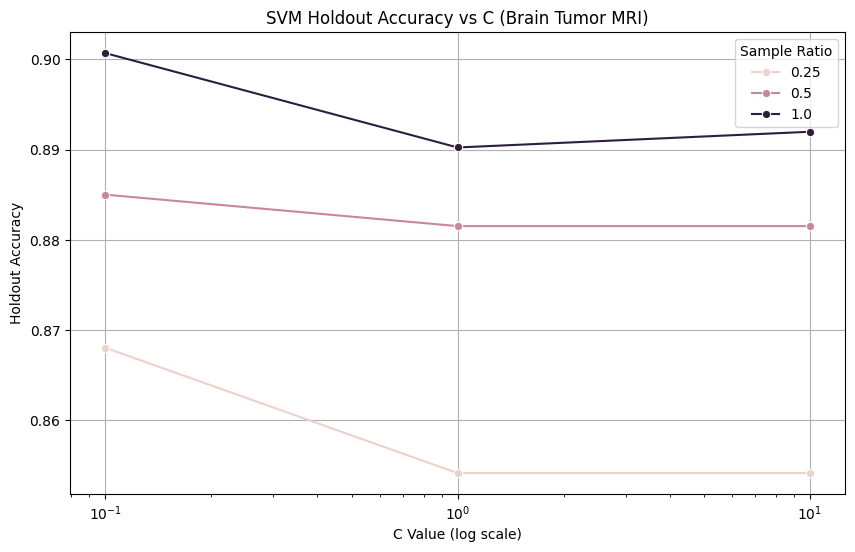

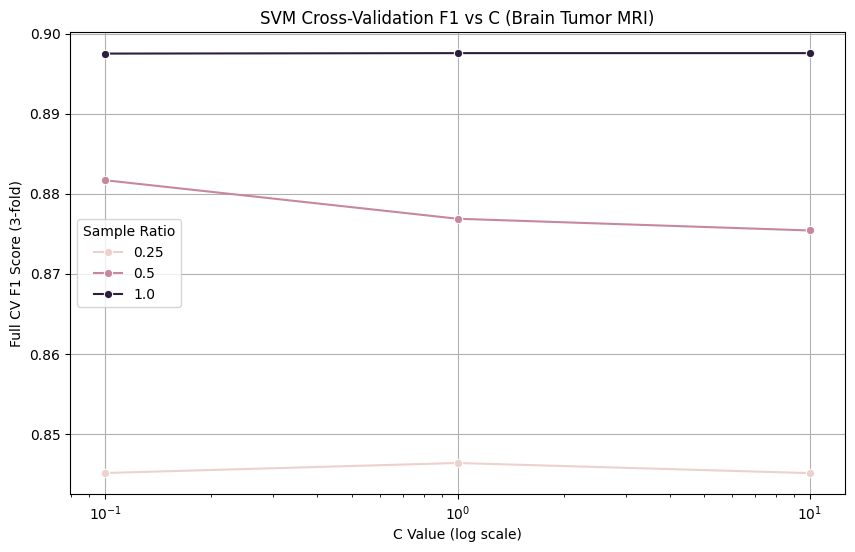

SVM Evaluation Complete for Brain Tumor MRI Dataset
   Sample Ratio     C  Accuracy (Holdout)  F1 (Holdout CV)  \
0          1.00   0.1            0.900697         0.898278   
1          1.00   1.0            0.890244         0.895159   
2          1.00  10.0            0.891986         0.894753   
3          0.50   0.1            0.885017         0.874395   
4          0.50   1.0            0.881533         0.876386   
5          0.50  10.0            0.881533         0.874621   
6          0.25   0.1            0.868056         0.812656   
7          0.25   1.0            0.854167         0.808848   
8          0.25  10.0            0.854167         0.808848   

   F1 (Full CV 3-fold)  Training Time (s)  
0             0.897517           5.313745  
1             0.897575           5.524366  
2             0.897575           3.026856  
3             0.881688           7.763426  
4             0.876878          38.082190  
5             0.875411          13.658174  
6             0.845

In [7]:

#Step 5: Visualize Results
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x="C", y="Accuracy (Holdout)", hue="Sample Ratio", marker="o")
plt.xscale('log')
plt.title("SVM Holdout Accuracy vs C (Brain Tumor MRI)")
plt.xlabel("C Value (log scale)")
plt.ylabel("Holdout Accuracy")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x="C", y="F1 (Full CV 3-fold)", hue="Sample Ratio", marker="o")
plt.xscale('log')
plt.title("SVM Cross-Validation F1 vs C (Brain Tumor MRI)")
plt.xlabel("C Value (log scale)")
plt.ylabel("Full CV F1 Score (3-fold)")
plt.grid(True)
plt.show()

#Final output
print("SVM Evaluation Complete for Brain Tumor MRI Dataset")
print(results_df)
